---

# K Nearest Neighbors

## Introduction

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.

<p>
    <img src="KNN.png" width="500" align="center">
</p>

KNN is a lazy learning and non-parametric algorithm. It's called a lazy learning algorithm or lazy learner because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.

It's considered a non-parametric method because it doesn’t make any assumptions about the underlying data distribution. Simply put, KNN tries to determine what group a data point belongs to by looking at the data points around it.

## Algorithm

1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each data point in the data
 - Find the Euclidean distance to all training data samplesa. 
   $$d(p, q) = \sqrt{(p - q)^{T} (p - q)}$$
 - Store the distances on an ordered list and sort it
 - Choose the top K entries from the sorted list
 - Label the test point based on the majority of classes present in the selected points
4. End

To validate the accuracy of the KNN classification, a confusion matrix is used. 

## Choosing the right value for K

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

Here are some things to keep in mind:

1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.

2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

### Then how to select the optimal K value?

* There are no pre-defined statistical methods to find the most favorable value of K.

* Initialize a random K value and start computing.

* Choosing a small value of K leads to unstable decision boundaries.

* The substantial K value is better for classification as it leads to smoothening the decision boundaries.

* Derive a plot between error rate and K denoting values in a defined range. Choose the K value having the minimum error rate. 

### Advantages

* The algorithm is simple and easy to implement.

* There’s no need to build a model, tune several parameters, or make additional assumptions.

* The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).



### Disadvantages

* The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

---

## Implement

Fisrt, we load the data and visualize it.

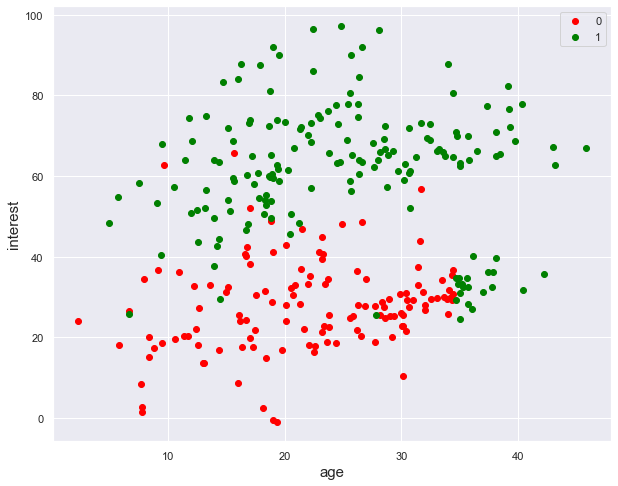

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("classification.csv")
results = [0.0, 1.0]
colors = ["red", "green"]
fig, ax = plt.subplots(figsize = (10, 8))
for results, colors in zip(results, colors):
    temp_df = df[df.success == results]
    ax.scatter(temp_df.age,
               temp_df.interest,
               c = colors,
               label = int(results), 
               )
    
ax.set_xlabel("age", fontsize = 15)
ax.set_ylabel("interest", fontsize = 15)
ax.legend()
plt.show()

From the plot above, we can see that similar data exist in close proximity. Where label "1" represents the success and the "0" represents fail.

Next, we create a training set and testing set and define the Euclidean distance function.

In [13]:
X = df[["age","interest"]].to_numpy()

y = df["success"].to_numpy()
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

With the distance function, now we can define a function to compute the k-nearest neighbors to a given point.

In [14]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

Let's test the fucntion above.

In [15]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 6)

[[array([28.04317445, 96.18334151]), 1, 3.375431976641251],
 [array([26.63444707, 91.96624817]), 1, 5.517248402947842],
 [array([25.67742044, 90.11821153]), 1, 7.109571200149718],
 [array([18.99504633, 92.06788736]), 1, 7.744754439265049],
 [array([19.54978775, 89.95151595]), 1, 8.94024803593901],
 [array([33.97345483, 87.87080012]), 1, 13.054536763647642]]

In [16]:
y_test[-1]

1

The true lable  is "1.0", and the outputs of our k nearest neighbors function test are all "1.0". It looks great!

Notice KNN can be used for both classification and regression machine learning. We can adjust the function used for the both. 

In [17]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)

1

It's still great!

Next we write a function to compute the classification error

In [18]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.05333333333333334

How to choose a optional k? Next, we write a function to check errors of different value of K to choose the optional.

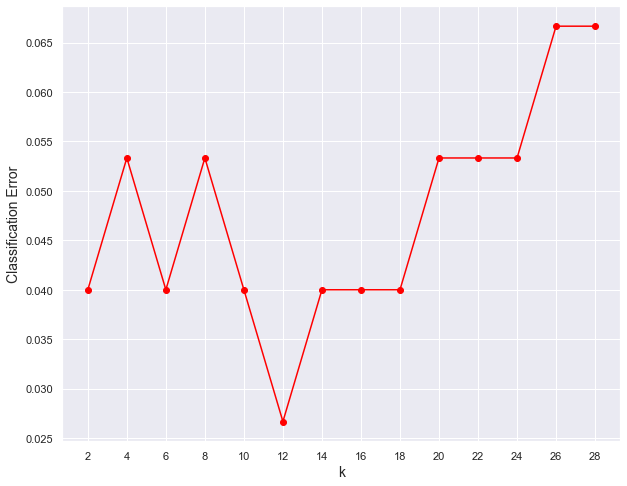

In [19]:
possible_k = [k for k in range(2, 30, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

As the figure shown above, when k=12, the classification error is minimim.